In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Mon May  1 23:07:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
import numpy as np
import cv2
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
images = []
labels = []

In [8]:
# Load the FVC2000 dataset

train_dir = '/content/drive/MyDrive/Fingerprint/FVC2000_DB4_B/dataset/train_data'
for j in range(0, 10):
    for k in range(0, 80):
        path = '0000' + str(j) + '_';
        if k <= 9:
            path = path + '0';
        path = path + str(k) + '.bmp';
        img_path = os.path.join(train_dir, path)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error: Failed to read {img_path}")
            continue
        img = cv2.resize(img, (256, 256))
        img = np.expand_dims(img, axis=-1)

        images.append(img)
        labels.append(j)

In [9]:
images = np.array(images)
labels = np.array(labels)

In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image

In [11]:
IMAGE_SIZE = [256, 256, 3]
inc = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

for layer in inc.layers:
  layer.trainable = False
for layer in inc.layers:
  layer.trainable = False

87910968/87910968 [==============================] - 5s 0us/step


In [12]:
x = Flatten()(inc.output)
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=inc.input, outputs=prediction)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
# Train the model
history = model.fit(images, 
                    labels,
                    epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 [==============================] - 15s 80ms/step - loss: 694.7738 - accuracy: 0.1550
Epoch 2/30
25/25 [==============================] - 2s 80ms/step - loss: 185.8333 - accuracy: 0.4275
Epoch 3/30
25/25 [==============================] - 2s 82ms/step - loss: 66.5442 - accuracy: 0.6775
Epoch 4/30
25/25 [==============================] - 2s 82ms/step - loss: 45.6851 - accuracy: 0.7400
Epoch 5/30
25/25 [==============================] - 2s 80ms/step - loss: 22.5345 - accuracy: 0.8475
Epoch 6/30
25/25 [==============================] - 2s 80ms/step - loss: 22.1152 - accuracy: 0.8213
Epoch 7/30
25/25 [==============================] - 2s 80ms/step - loss: 36.8844 - accuracy: 0.7763
Epoch 8/30
25/25 [==============================] - 2s 81ms/step - loss: 24.1288 - accuracy: 0.8350
Epoch 9/30
25/25 [==============================] - 2s 82ms/step - loss: 15.0134 - accuracy: 0.8650
Epoch 10/30
25/25 [==============================] - 2s 82ms/step - loss: 13.7444 - accuracy: 0.8825
Epoch 1

In [15]:
model.save('/content/drive/MyDrive/Fingerprint/FVC2000_DB4_B/InceptionV3.h5')

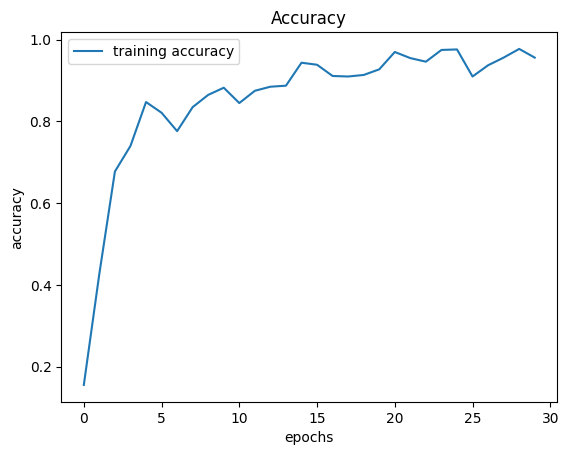

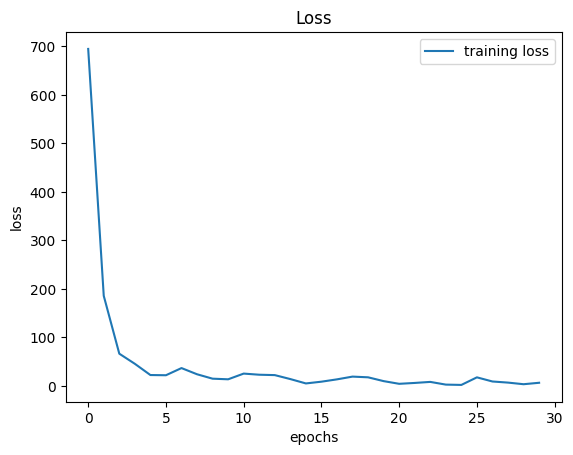

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
score = model.evaluate(images, labels, verbose=0)
print('accuracy:', score[1])

accuracy: 0.9649999737739563
